In [1]:
# %load_ext autoreload
# %autoreload 2
# %matplotlib widget
from ff_energy.cli import load_config_maker, load_all_theory, charmm_jobs

# from ff_energy.structure import
from ff_energy.potential import FF, LJ
import numpy as np
from ff_energy.data import Data  # , plot_ecol, plot_intE
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import pandas as pd

# from ff_energy.utils import *
from ff_energy.data import Data
from ff_energy.plot import plot_energy_MSE

sig_bound = (0.5, 4.0)
ep_bound = (0.00001, 1.0)
LJ_bound = [(sig_bound), (sig_bound), (ep_bound), (ep_bound)]

# PBE0 DZ

##  PC

loading pickles from  pickles/water_cluster/pbe0dz/pbe0_dz.pc
Strcuture,PDB already already exists, loading structure from pickle
Fitting parameters: kb, ka, r0, a0
393


/home/boittier/Documents/phd/ff_energy/ff_energy/bonded_terms.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_monomer_df = self.df.groupby(


,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
test467,-113.436686,test467,21.55483,-53.42358,14.82881,test467,-1527.154217,test467,20,-1527.236629,190,-51.714066,-50.297664,-958293.852586,-958295.211607,-958345.566652,-38.59477,-38.59477
test263,-159.213355,test263,19.76551,-80.17211,20.54380,test263,-1527.156016,test263,20,-1527.258259,190,-64.157783,-66.601357,-958294.981314,-958296.144719,-958359.139096,-59.62831,-59.62831
test35,-138.530827,test35,22.57516,-66.12227,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,-958286.913137,-958288.376038,-958359.343368,-55.07006,-55.07006
test223,-85.840765,test223,23.27997,-40.47928,6.72946,test223,-1527.147556,test223,20,-1527.203106,190,-34.857221,-39.243367,-958289.673128,-958290.449874,-958324.530348,-33.74982,-33.74982
test254,-157.431989,test254,24.42066,-82.00400,21.85417,test254,-1527.135568,test254,20,-1527.237145,188,-63.739697,-57.830990,-958282.150371,-958283.041933,-958345.890067,-60.14983,-60.14983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test100,-120.244324,test100,23.76369,-66.03681,19.45476,test100,-1527.141372,test100,20,-1527.210157,190,-43.162995,-42.125801,-958285.792204,-958287.528319,-958328.955198,-46.58205,-46.58205
test304,-123.903711,test304,21.68895,-69.20978,17.28253,test304,-1527.150985,test304,20,-1527.239633,189,-55.626955,-54.710834,-958291.824384,-958293.116885,-958347.451339,-51.92725,-51.92725
test327,-195.846922,test327,19.73276,-103.42656,31.12436,test327,-1527.154084,test327,20,-1527.300559,190,-91.913853,-79.340573,-958293.768884,-958295.335949,-958385.682737,-72.30220,-72.30220
test185,-114.232038,test185,24.07288,-60.27765,11.20177,test185,-1527.144999,test185,20,-1527.232387,190,-54.835874,-54.451833,-958288.068584,-958289.053297,-958342.904458,-49.07588,-49.07588


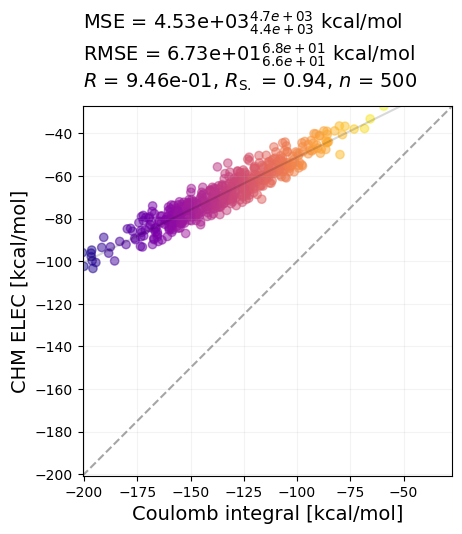

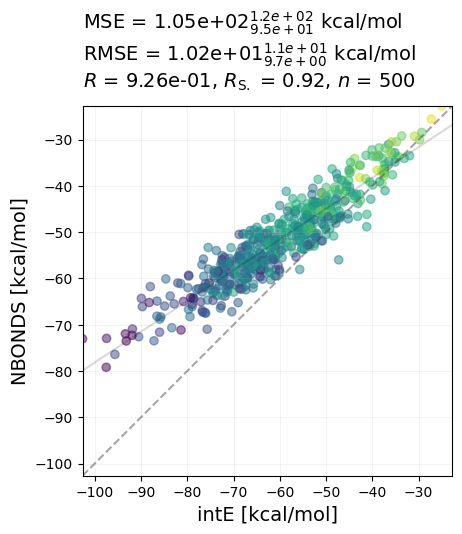

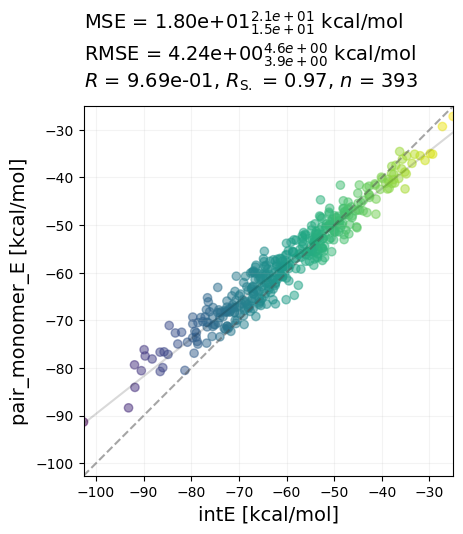

In [2]:
data_ = Data("pickles/water_cluster/pbe0dz/pbe0_dz.pc")
data_.plot_ecol()
data_.plot_intE()
data_.plot_pair_monomer_E()
pc_pbedz = data_.data
pc_pbedz

#  pbe0dz d4

loading pickles from  pickles/water_cluster/pbe0dzd4/pbe0_dz.pc
Strcuture,PDB already already exists, loading structure from pickle
Fitting parameters: kb, ka, r0, a0


/home/boittier/Documents/phd/ff_energy/ff_energy/bonded_terms.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_monomer_df = self.df.groupby(
/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/scipy/stats/_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


497


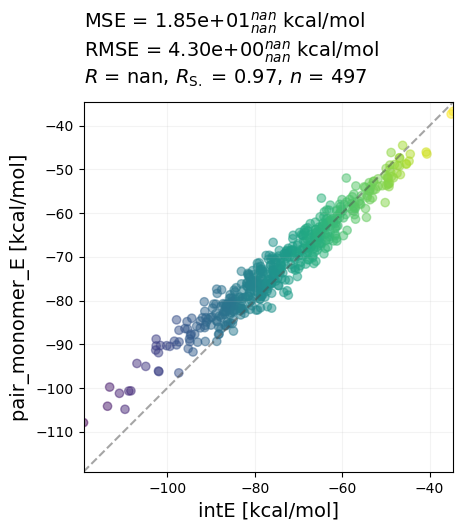

In [2]:
data_2 = Data("pickles/water_cluster/pbe0dzd4/pbe0_dz.pc")
data_2.plot_pair_monomer_E()
pc_pbedz_d4 = data_2.data


In [9]:
pc_pbedz_d4_copy = pc_pbedz.copy()
pc_pbedz_d4_copy.head()

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
test467,-113.436686,test467,21.55483,-53.42358,14.82881,test467,-1527.154217,test467,20,-1527.236629,190,-51.714066,-50.297664,-958293.852586,-958295.211607,-958345.566652,-38.59477,-38.59477
test263,-159.213355,test263,19.76551,-80.17211,20.54380,test263,-1527.156016,test263,20,-1527.258259,190,-64.157783,-66.601357,-958294.981314,-958296.144719,-958359.139096,-59.62831,-59.62831
test35,-138.530827,test35,22.57516,-66.12227,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,-958286.913137,-958288.376038,-958359.343368,-55.07006,-55.07006
test223,-85.840765,test223,23.27997,-40.47928,6.72946,test223,-1527.147556,test223,20,-1527.203106,190,-34.857221,-39.243367,-958289.673128,-958290.449874,-958324.530348,-33.74982,-33.74982
test254,-157.431989,test254,24.42066,-82.00400,21.85417,test254,-1527.135568,test254,20,-1527.237145,188,-63.739697,-57.830990,-958282.150371,-958283.041933,-958345.890067,-60.14983,-60.14983


In [8]:
pc_pbedz_d4.head()

,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol
test467,None,None,None,test467,-1527.157405,test467,20.0,-1527.260977,190,-64.991515,-63.648003,-958295.853041,-958297.210085,-958360.844556
test263,None,None,None,test263,-1527.159203,test263,20.0,-1527.286187,190,-79.682966,-82.192121,-958296.981291,-958298.142757,-958376.664258
test35,None,None,None,test35,-1527.146351,test35,20.0,-1527.281757,190,-84.967747,-82.379009,-958288.916673,-958290.376761,-958373.884419
test223,None,None,None,test223,-1527.150761,test223,20.0,-1527.225180,190,-46.697637,-51.221802,-958291.684287,-958292.461129,-958338.381925
test254,None,None,None,test254,-1527.138789,test254,20.0,-1527.262467,190,-77.608492,-76.767666,-958284.171602,-958285.064850,-958361.780093


In [10]:
keys = ['M_ENERGY', 'C_ENERGY', 'intE', 'P_intE', 'm_E_tot',
       'p_m_E_tot', 'C_ENERGY_kcalmol']
for k in keys:
    pc_pbedz_d4_copy[k] = pc_pbedz_d4[k]

In [11]:
pc_pbedz_d4_copy.head()

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
test467,-113.436686,test467,21.55483,-53.42358,14.82881,test467,-1527.157405,test467,20,-1527.260977,190,-64.991515,-63.648003,-958295.853041,-958297.210085,-958360.844556,-38.59477,-38.59477
test263,-159.213355,test263,19.76551,-80.17211,20.54380,test263,-1527.159203,test263,20,-1527.286187,190,-79.682966,-82.192121,-958296.981291,-958298.142757,-958376.664258,-59.62831,-59.62831
test35,-138.530827,test35,22.57516,-66.12227,11.05221,test35,-1527.146351,test35,20,-1527.281757,189,-84.967747,-82.379009,-958288.916673,-958290.376761,-958373.884419,-55.07006,-55.07006
test223,-85.840765,test223,23.27997,-40.47928,6.72946,test223,-1527.150761,test223,20,-1527.225180,190,-46.697637,-51.221802,-958291.684287,-958292.461129,-958338.381925,-33.74982,-33.74982
test254,-157.431989,test254,24.42066,-82.00400,21.85417,test254,-1527.138789,test254,20,-1527.262467,188,-77.608492,-76.767666,-958284.171602,-958285.064850,-958361.780093,-60.14983,-60.14983


In [12]:
from ff_energy.utils import pickle_output, read_from_pickle
data_.data = pc_pbedz_d4_copy
pickle_output(data_, "data_pc_pbe0_d4.obj")
data_from_pkl = read_from_pickle("pickles/data_pc_pbe0_d4.obj.pkl")
data = next(data_from_pkl)
data

In [35]:
from ff_energy.plot import plot_energy_MSE
dispersion_comp = pbe0_dz_pc.join(pairs,rsuffix="-D4")

In [5]:
data_.structures[0].set_2body()

In [7]:
data_.structures[0].distances_pairs

[{},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {(1, 2): [array([5.70076118, 5.70076118, 4.41991561, 4.41991561])],
  (1, 3): [array([8.78335898, 8.78335898, 7.26735722, 7.26735722])],
  (1, 4): [array([4.90334467, 4.90334467, 6.04737811, 6.04737811])],
  (1, 5): [array([3.26214086, 3.26214086, 4.47032057, 4.47032057])],
  (1, 6): [array([8.48691198, 8.48691198, 7.72356511, 7.72356511])],
  (1, 7): [array([10.48727219, 10.48727219,  7.8776393 ,  7.8776393 ])],
  (1, 8): [array([4.61690253, 4.61690253, 5.14851299, 5.14851299])],
  (1, 9): [array([7.72942663, 7.72942663, 8.51369796, 8.51369796])],
  (1, 10): [array([9.54359948, 9.54359948, 9.8113867 , 9.8113867 ])],
  (1, 11): [array([6.65867622, 6.65867622, 7.29759782, 7.29759782])],
  (1, 12): [array([2.69764879, 2.69764879, 3.01445799, 3.01445799])],
  (1, 13): [array([6.11131459, 6.11131459, 5.52528343, 5.52528343])],
  (1, 14): [array([9.17166991, 9.17166991, 8.50404392, 8.50404392])],
  (1, 15): [array([

In [206]:
data_.pairs_df

,p_ENERGY,p_m1_ENERGY,p_m2_ENERGY,p_int_ENERGY,key,pair
test467_4_16,-152.718742,-76.359402,-76.358684,-0.000656,test467,"(4, 16)"
test467_2_12,-152.717266,-76.357394,-76.359906,0.000034,test467,"(2, 12)"
test467_4_5,-152.714677,-76.359402,-76.355286,0.000012,test467,"(4, 5)"
test467_5_16,-152.713801,-76.355286,-76.358684,0.000168,test467,"(5, 16)"
test467_4_20,-152.714093,-76.359402,-76.354903,0.000213,test467,"(4, 20)"
...,...,...,...,...,...,...
test66_3_5,-152.705818,-76.352102,-76.354001,0.000286,test66,"(3, 5)"
test66_2_20,-152.707280,-76.352639,-76.354519,-0.000122,test66,"(2, 20)"
test66_3_10,-152.711822,-76.352102,-76.359671,-0.000049,test66,"(3, 10)"
test66_4_15,-152.712115,-76.358842,-76.353240,-0.000033,test66,"(4, 15)"


In [209]:
data_.coloumb

,ECOL,KEY
test467_1_2.py,-0.098394,test467_1_2.py
test467_1_3.py,-0.059956,test467_1_3.py
test467_1_4.py,-6.949478,test467_1_4.py
test467_1_5.py,0.314807,test467_1_5.py
test467_1_6.py,-1.04799,test467_1_6.py
...,...,...
test66_6_13.py,-0.119866,test66_6_13.py
test66_2_14.py,-0.107737,test66_2_14.py
test66_2_16.py,0.021253,test66_2_16.py
test66_7_15.py,-0.018651,test66_7_15.py


In [211]:
data_.coloumb.index = [_.split(".")[0] for _ in data_.coloumb.index]
pairs_df = pd.concat([data_.coloumb, data_.pairs_df], axis=1)  # .dropna()
pairs_df

,ECOL,KEY,p_ENERGY,p_m1_ENERGY,p_m2_ENERGY,p_int_ENERGY,key,pair
test467_1_2,-0.098394,test467_1_2.py,-152.714095,-76.356498,-76.357394,-0.000203,test467,"(1, 2)"
test467_1_3,-0.059956,test467_1_3.py,-152.715701,-76.356498,-76.359083,-0.000120,test467,"(1, 3)"
test467_1_4,-6.949478,test467_1_4.py,-152.723089,-76.356498,-76.359402,-0.007189,test467,"(1, 4)"
test467_1_5,0.314807,test467_1_5.py,-152.711647,-76.356498,-76.355286,0.000137,test467,"(1, 5)"
test467_1_6,-1.04799,test467_1_6.py,-152.715755,-76.356498,-76.357342,-0.001915,test467,"(1, 6)"
...,...,...,...,...,...,...,...,...
test66_6_13,-0.119866,test66_6_13.py,-152.710780,-76.355825,-76.354763,-0.000192,test66,"(6, 13)"
test66_2_14,-0.107737,test66_2_14.py,-152.711776,-76.352639,-76.358945,-0.000191,test66,"(2, 14)"
test66_2_16,0.021253,test66_2_16.py,-152.711349,-76.352639,-76.358740,0.000030,test66,"(2, 16)"
test66_7_15,-0.018651,test66_7_15.py,-152.711233,-76.357956,-76.353240,-0.000037,test66,"(7, 15)"


In [212]:
from ff_energy.data import pairs_data

In [213]:
pairs_df = pairs_data(pairs_df)

Strcuture,PDB already already exists, loading structure from pickle


In [34]:
pairs_df.keys()

Index(['ECOL', 'KEY', 'p_ENERGY', 'p_m1_ENERGY', 'p_m2_ENERGY', 'p_int_ENERGY',
       'key', 'pair', 'ECOL_PC', 'angle_1', 'angle_2', 'dih', 'theta',
       'distance', 'min_hbond', 'dcms'],
      dtype='object')

In [48]:
from ff_energy.utils import *

#  Pickle the data

In [49]:
pickle_output(pairs_df, "pairs_df")

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

loading pickles from  /home/boittier/Documents/phd/ff_energy/pickles/water_cluster/pbe0dz/pbe0_dz.pc
Strcuture,PDB already already exists, loading structure from pickle
test467_1_2
test467_1_3
test467_1_4
test467_1_5
test467_1_6
test467_1_7
test467_1_8
test467_1_9
test467_1_10
test467_1_11
test467_1_12
test467_1_13
test467_1_14
test467_1_15
test467_1_16
test467_1_17
test467_1_18
test467_1_19
test467_1_20
test467_2_3
test467_2_4
test467_2_5
test467_2_6
test467_2_7
test467_2_8
test467_2_9
test467_2_10
test467_2_11
test467_2_12
test467_2_13
test467_2_14
test467_2_15
test467_2_16
test467_2_17
test467_2_18
test467_2_19
test467_2_20
test467_3_4
test467_3_5
test467_3_6
test467_3_7
test467_3_8
test467_3_9
test467_3_10
test467_3_11
test467_3_12
test467_3_13
test467_3_14
test467_3_15
test467_3_16
test467_3_17
test467_3_18
test467_3_19
test467_3_20
test467_4_5
test467_4_6
test467_4_7
test467_4_8
test467_4_9
test467_4_10
test467_4_11
test467_4_13
test467_4_12
test467_4_14
test467_4_15
test467_4_16

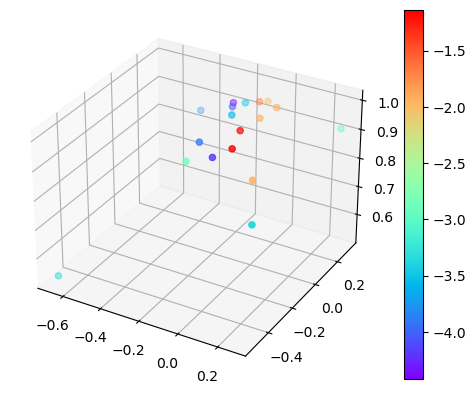

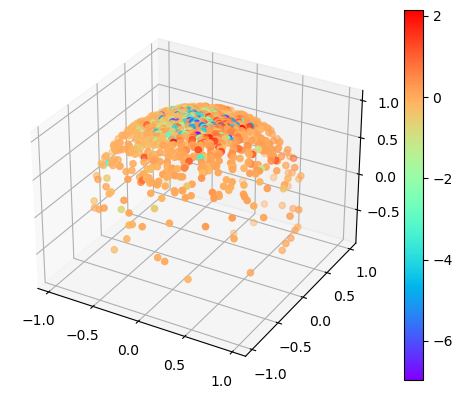

Press Enter to continue... 


In [5]:
from ff_energy.data import df

In [92]:
pairs_df.keys()

Index(['ECOL', 'KEY', 'p_ENERGY', 'p_m1_ENERGY', 'p_m2_ENERGY', 'p_int_ENERGY',
       'key', 'pair', 'ECOL_PC', 'angle_1', 'angle_2', 'dih', 'theta',
       'distance', 'min_hbond', 'dcms'],
      dtype='object')

In [374]:
PC_dimer_anio = data_.coloumb

###  Dimers


In [75]:
# data_.coloumb.plot.scatter("avg_dist", "SE")
import seaborn as sns

plt.set_cmap("plasma")
# PC_dimer_anio = data_.coloumb.copy()
PC_dimer_anio["C_error"] = PC_dimer_anio["ECOL"] - PC_dimer_anio["Ecol_dcm"]
plt.scatter(
    PC_dimer_anio["dist_CM"],
    PC_dimer_anio["C_error"],
    c=PC_dimer_anio["ECOL"],
    alpha=0.5,
)
# sns.lineplot(data_.coloumb, x = "dist_CM", y = "C_error", alpha=0.99, errorbar=("sd",1), c="gray")

plt.ylabel("$\Delta E_{\mathrm{Coulomb}}$ [kcal/mol]", fontsize=20)
plt.xlabel("$r_{\mathrm{CM.}}$ [$\mathrm{\AA}$]", fontsize=20)
plt.ylim(-12, 3)
plt.xlim(0.9, 6)
plt.axhline(0, c="k", linewidth=0.1)

NameError: name 'PC_dimer_anio' is not defined

<Figure size 640x480 with 0 Axes>

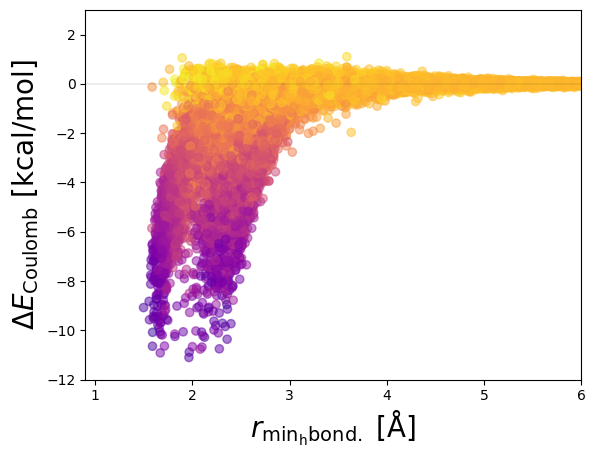

In [302]:
# data_.coloumb.plot.scatter("avg_dist", "SE")
import seaborn as sns

plt.set_cmap("plasma")
# PC_dimer_anio = data_.coloumb.copy()
PC_dimer_anio["C_error"] = PC_dimer_anio["ECOL"] - PC_dimer_anio["Ecol_dcm"]

plt.scatter(
    PC_dimer_anio["min_hbond"],
    PC_dimer_anio["C_error"],
    c=PC_dimer_anio["ECOL"],
    alpha=0.5,
)
# sns.lineplot(data_.coloumb, x = "dist_CM", y = "C_error", alpha=0.99, errorbar=("sd",1), c="gray")

plt.ylabel("$\Delta E_{\mathrm{Coulomb}}$ [kcal/mol]", fontsize=20)
plt.xlabel("$r_{\mathrm{min_hbond.}}$ [$\mathrm{\AA}$]", fontsize=20)
plt.ylim(-12, 3)
plt.xlim(0.9, 6)
plt.axhline(0, c="k", linewidth=0.1)

In [303]:
PC_dimer_anio["C_error"]

test467_1_2.py     0.038693
test467_1_3.py    -0.036377
test467_1_4.py    -3.596629
test467_1_5.py      0.40427
test467_1_6.py    -0.065155
                     ...   
test66_16_17.py    -0.01997
test66_7_12.py    -0.011533
test66_15_20.py    0.039249
test66_4_15.py     0.161391
test66_6_11.py     0.002339
Name: C_error, Length: 52016, dtype: object

<Axes: xlabel='dih_bin', ylabel='C_error'>

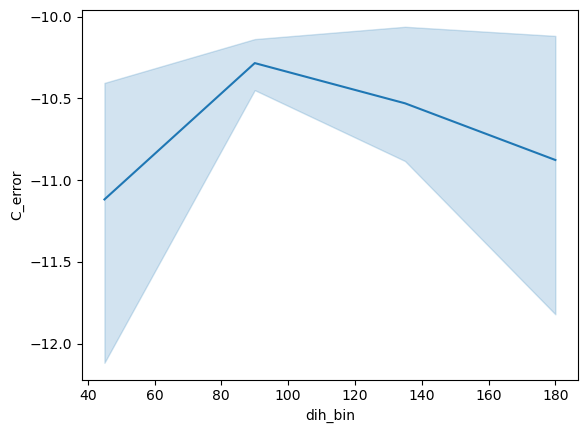

In [74]:
PC_dimer_anio["dih_bin"] = (
    np.digitize(PC_dimer_anio["dih_dcms"], bins=[0, 45, 90, 135, 180]) * 45
)

_ = PC_dimer_anio[PC_dimer_anio["C_error"] < -10]
sns.lineplot(_, x="dih_bin", y="C_error")

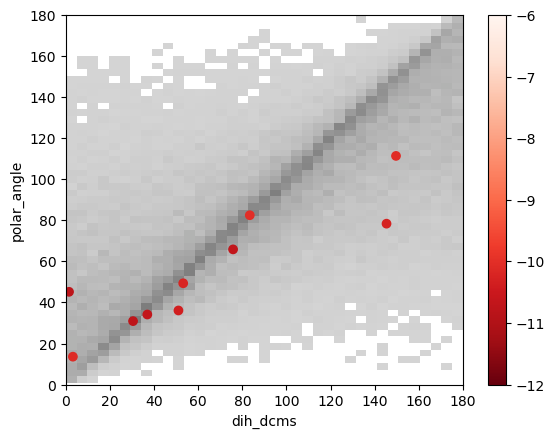

In [75]:
_ = PC_dimer_anio[PC_dimer_anio["min_hbond"] > 2]

sns.histplot(_, x="dih_dcms", y="polar_angle", color="grey", alpha=0.75)


_ = _[_["C_error"] < -10]


sc = plt.scatter(
    _["dih_dcms"], _["polar_angle"], c=_["C_error"], alpha=1, cmap="Reds_r"
)
plt.colorbar(sc)
plt.xlim(0, 180)
plt.ylim(0, 180)
plt.clim(-12, -6)

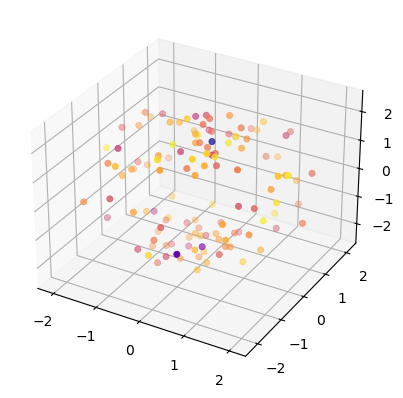

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d


_ = PC_dimer_anio[PC_dimer_anio["ECOL"] < -14]


THETA, PHI = _["polar_angle"], _["dih_dcms"]

tri = Triangulation(np.ravel(THETA), np.ravel(PHI))


# THETA, PHI = np.meshgrid(theta, phi)
R = PC_dimer_anio["min_hbond"]
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
plot = ax.scatter(X, Y, Z, linewidth=0.5, c=_["C_error"])
# ax.plot(*np.array([[0, 0, 0], [1,1,1]]))
plt.show()

In [305]:
PC_dimer_anio["kmdcm_C_error"] = kMDCM_dimer_anio["C_error"]
PC_dimer_anio["kmdcm_Ecol_dcm"] = kMDCM_dimer_anio["Ecol_dcm"]
PC_dimer_anio["mdcm_C_error"] = mdcm_dimer_anio["C_error"]
PC_dimer_anio["mdcm_Ecol_dcm"] = mdcm_dimer_anio["Ecol_dcm"]

In [306]:
# PC_dimer_anio
PC_dimer_anio.to_csv("dimer_elec_pc.csv", index=False)
# data_.coloumb.to_parquet("dimer_elec_pc.pq", index=False)

In [337]:
PC_dimer_anio.describe()

,Ecol_dcm,polar_angle,dist_CM,dih_dcms,min_hbond,azimuthal_angle,kmdcm_Ecol_dcm,mdcm_Ecol_dcm
count,52016.000000,52016.000000,52016.000000,52016.000000,52016.000000,5.201600e+04,52016.000000,52016.000000
mean,-0.351821,31.818146,6.002935,86.663061,5.550327,4.252652e+00,-0.405077,-0.351821
std,1.266166,89.412850,2.138426,52.072082,2.086553,8.881870e-16,1.452624,1.266166
min,-8.357624,-179.201101,0.106302,0.023053,1.497232,4.252652e+00,-11.215566,-8.357624
25%,-0.264777,-48.799801,4.451506,41.055251,3.975225,4.252652e+00,-0.260932,-0.264777
50%,-0.040411,58.496813,6.073158,84.594262,5.437917,4.252652e+00,-0.039317,-0.040411
75%,0.097670,99.130760,7.582133,131.412878,7.110597,4.252652e+00,0.090371,0.097670
max,3.413001,179.482707,11.794094,179.995625,11.752742,4.252652e+00,4.429839,3.413001


In [343]:
# data_.coloumb["dcm_dih"]
PC_dimer_anio[PC_dimer_anio["ECOL"] > PC_dimer_anio["ECOL"].quantile(0.99)]

,ECOL,KEY,key,m1,m2,Ecol_dcm,polar_angle,dist_CM,dih_dcms,min_hbond,kmdcm_C_error,azimuthal_angle,dcm_coords,C_error,kmdcm_Ecol_dcm,mdcm_C_error,mdcm_Ecol_dcm
test467_2_4.py,1.470972,test467_2_4.py,test467,2,4,1.260478,-63.258835,4.921442,120.188508,2.372313,-0.002531,4.252652,"[[[-0.1375094933213971, -0.7529211889509216, 0...",0.210494,1.473503,-0.447583,1.260478
test467_5_10.py,1.515774,test467_5_10.py,test467,5,10,1.587293,22.630724,4.789306,23.348419,3.352002,-0.375291,4.252652,"[[[-0.13624739563323046, -0.7376353264248771, ...",-0.071519,1.891065,-0.90022,1.587293
test223_2_10.py,1.494036,test223_2_10.py,test223,2,10,1.916533,97.854558,2.855130,112.951986,1.835487,-1.621077,4.252652,"[[[-0.15465337395401688, -0.7797693338254162, ...",-0.422497,3.115113,-1.423089,1.916533
test223_13_16.py,1.727195,test223_13_16.py,test223,13,16,1.179141,72.070257,4.186690,29.618501,2.353462,0.046954,4.252652,"[[[-0.14715549789855678, -0.7555400375335046, ...",0.548054,1.680241,-0.067556,1.179141
test254_14_15.py,1.746198,test254_14_15.py,test254,14,15,2.144370,40.042833,5.088830,39.116575,2.367717,-0.477196,4.252652,"[[[-0.14045351164993292, -0.7604043893750239, ...",-0.398172,2.223395,-1.517713,2.144370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test489_14_16.py,1.492678,test489_14_16.py,test489,14,16,1.102614,90.284337,5.688841,76.912812,3.738522,0.063361,4.252652,"[[[-0.14899344891960617, -0.7637808363443565, ...",0.390063,1.429317,-0.185594,1.102614
test100_1_20.py,2.313419,test100_1_20.py,test100,1,20,2.773598,27.836523,6.708041,0.548960,3.416065,-0.298663,4.252652,"[[[-0.125996021385083, -0.7320212220350569, 0....",-0.460179,2.612082,-1.908231,2.773598
test304_10_11.py,1.961369,test304_10_11.py,test304,10,11,1.499413,-55.712960,2.067154,86.596602,2.357434,0.026442,4.252652,"[[[-0.15115394452884023, -0.7895866752385379, ...",0.461955,1.934927,-0.320865,1.499413
test327_3_13.py,2.573158,test327_3_13.py,test327,3,13,2.396334,34.084036,6.185735,16.659066,2.102137,-0.253039,4.252652,"[[[-0.1486630821345528, -0.7863558435148366, 0...",0.176823,2.826196,-1.074265,2.396334


###  angle

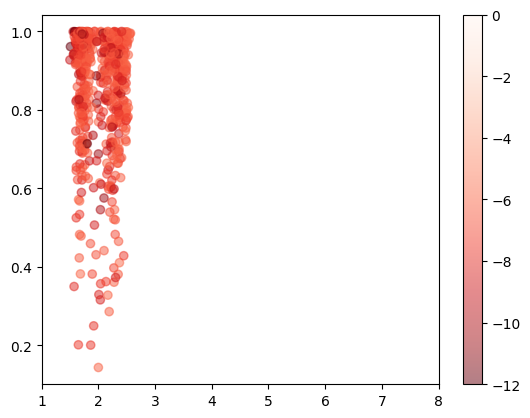

In [226]:
_ = PC_dimer_anio[PC_dimer_anio["C_error"] < -6]
sc = plt.scatter(
    _["min_hbond"], _["norm_angle"], c=_["C_error"], alpha=0.5, cmap="Reds_r"
)
plt.colorbar(sc)
plt.xlim(1, 8)
plt.clim(-12, 0)
# plt.ylim(0,180)

In [234]:
PC_dimer_anio.sort_values("C_error")

,ECOL,KEY,key,m1,m2,Ecol_dcm,dist_CM,polar_angle,azimuthal_angle,min_hbond,C_error,norm_angle
test460_2_6.py,-19.436563,test460_2_6.py,test460,2,6,-4.621965,2.650450,0.795310,5.775542,1.802578,-14.814597,0.714080
test378_1_2.py,-20.072318,test378_1_2.py,test378,1,2,-6.833749,2.182936,1.292084,2.903365,1.506559,-13.238569,0.961411
test39_17_20.py,-20.07284,test39_17_20.py,test39,17,20,-7.224046,1.873157,1.538715,3.663318,1.574444,-12.848793,0.999485
test323_2_6.py,-16.472633,test323_2_6.py,test323,2,6,-5.370468,3.008892,1.090824,3.667555,1.963915,-11.102166,0.887008
test37_11_16.py,-14.667644,test37_11_16.py,test37,11,16,-3.751444,2.027116,1.621629,2.335820,1.668854,-10.9162,0.998708
...,...,...,...,...,...,...,...,...,...,...,...,...
test167_3_4.py,1.869845,test167_3_4.py,test167,3,4,1.031427,3.561475,0.712980,5.983816,2.178213,0.838418,0.654091
test122_5_9.py,1.109338,test122_5_9.py,test122,5,9,0.268441,3.390550,1.538315,4.595365,2.290874,0.840897,0.999473
test15_15_16.py,2.900387,test15_15_16.py,test15,15,16,2.057140,4.570937,2.277293,3.441072,3.300861,0.843246,0.760641
test374_3_10.py,1.807988,test374_3_10.py,test374,3,10,0.752242,3.313301,0.431600,6.258822,1.894254,1.055746,0.418325


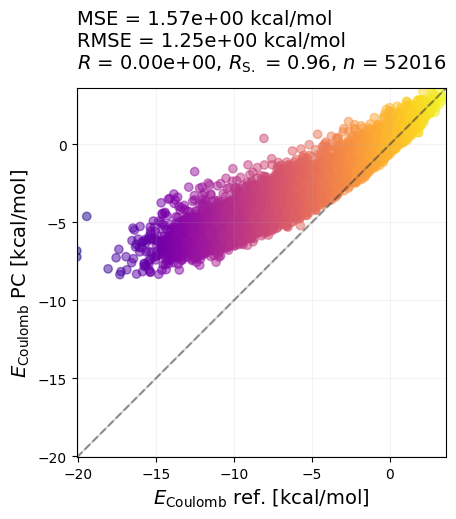

In [88]:
# COL = data_.coloumb
# COL = COL.dropna()
_ = plot_energy_MSE(
    PC_dimer_anio,
    "ECOL",
    "Ecol_dcm",
    elec="ECOL",
    CMAP="plasma",
    xlabel="$E_{\mathrm{Coulomb}}$ ref. [kcal/mol]",
    ylabel="$E_{\mathrm{Coulomb}}$ PC [kcal/mol]",
    bootstrap=False,
)
# COL["Ecol_dcm"]
# COL.plot.scatter("ECOL", "Ecol_dcm")
# COL

##  kMDCM

loading pickles from  pickles/water_cluster/pbe0dz/pbe0_dz.kmdcm
Strcuture,PDB already already exists, loading structure from pickle
Fitting parameters: kb, ka, r0, a0
393


/home/boittier/Documents/phd/ff_energy/ff_energy/bonded_terms.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_monomer_df = self.df.groupby(


,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
test467,-113.436686,test467,22.56645,-64.08560,14.82881,test467,-1527.154217,test467,20,-1527.236629,190,-51.714066,-50.297664,-958293.852586,-958295.211607,-958345.566652,-49.25679,-49.25679
test263,-159.213355,test263,21.29141,-92.76477,20.54380,test263,-1527.156016,test263,20,-1527.258259,190,-64.157783,-66.601357,-958294.981314,-958296.144719,-958359.139096,-72.22097,-72.22097
test35,-138.530827,test35,23.43646,-87.37824,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,-958286.913137,-958288.376038,-958359.343368,-76.32603,-76.32603
test223,-85.840765,test223,24.37323,-47.13218,6.72946,test223,-1527.147556,test223,20,-1527.203106,190,-34.857221,-39.243367,-958289.673128,-958290.449874,-958324.530348,-40.40272,-40.40272
test254,-157.431989,test254,27.07465,-90.75359,21.85417,test254,-1527.135568,test254,20,-1527.237145,188,-63.739697,-57.830990,-958282.150371,-958283.041933,-958345.890067,-68.89942,-68.89942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test100,-120.244324,test100,25.63059,-66.67887,19.45476,test100,-1527.141372,test100,20,-1527.210157,190,-43.162995,-42.125801,-958285.792204,-958287.528319,-958328.955198,-47.22411,-47.22411
test304,-123.903711,test304,23.20412,-72.62700,17.28253,test304,-1527.150985,test304,20,-1527.239633,189,-55.626955,-54.710834,-958291.824384,-958293.116885,-958347.451339,-55.34447,-55.34447
test327,-195.846922,test327,21.75196,-117.28678,31.12436,test327,-1527.154084,test327,20,-1527.300559,190,-91.913853,-79.340573,-958293.768884,-958295.335949,-958385.682737,-86.16242,-86.16242
test185,-114.232038,test185,25.65796,-69.10066,11.20177,test185,-1527.144999,test185,20,-1527.232387,190,-54.835874,-54.451833,-958288.068584,-958289.053297,-958342.904458,-57.89889,-57.89889


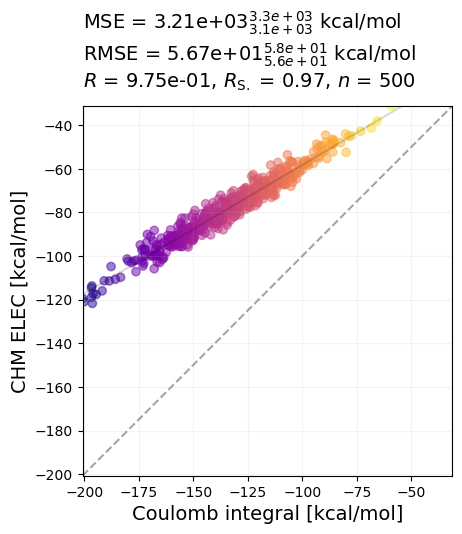

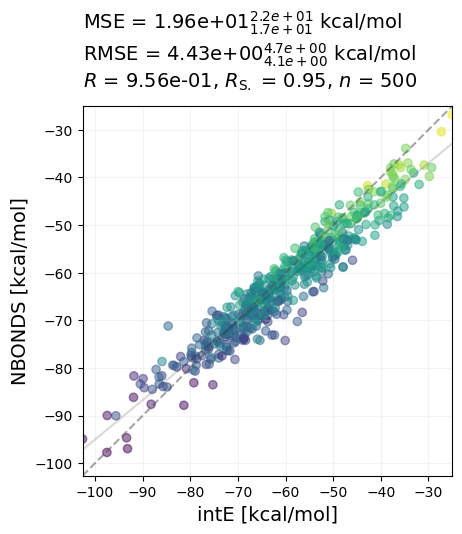

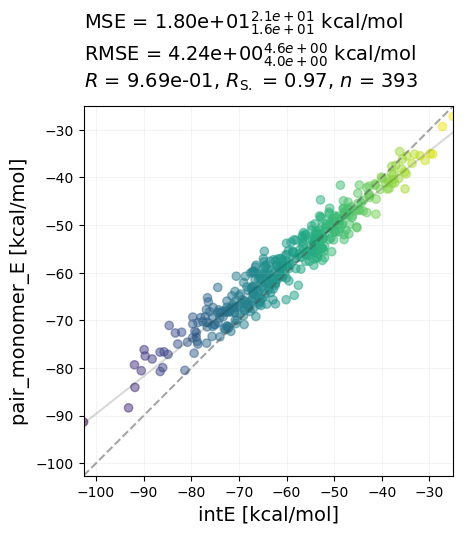

In [4]:
data_ = Data("pickles/water_cluster/pbe0dz/pbe0_dz.kmdcm")
# data_.data = data_.data[data_.data["ECOL"] < -40]
data_.plot_ecol()
data_.plot_intE()
data_.plot_pair_monomer_E()
pc_pbedz = data_.data
# # data_.data
# print(data_.data["n_pairs"].sum(), "/", 190 * 500)
# pairs = data_.data[data_.data["n_pairs"] >= 190]  # .plot.scatter("intE","p_intE")

# pairs
pc_pbedz

#  add the D4 data


In [5]:
pc_pbedz_d4_copy = pc_pbedz.copy()
pc_pbedz_d4_copy.head()

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
test467,-113.436686,test467,22.56645,-64.08560,14.82881,test467,-1527.154217,test467,20,-1527.236629,190,-51.714066,-50.297664,-958293.852586,-958295.211607,-958345.566652,-49.25679,-49.25679
test263,-159.213355,test263,21.29141,-92.76477,20.54380,test263,-1527.156016,test263,20,-1527.258259,190,-64.157783,-66.601357,-958294.981314,-958296.144719,-958359.139096,-72.22097,-72.22097
test35,-138.530827,test35,23.43646,-87.37824,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,-958286.913137,-958288.376038,-958359.343368,-76.32603,-76.32603
test223,-85.840765,test223,24.37323,-47.13218,6.72946,test223,-1527.147556,test223,20,-1527.203106,190,-34.857221,-39.243367,-958289.673128,-958290.449874,-958324.530348,-40.40272,-40.40272
test254,-157.431989,test254,27.07465,-90.75359,21.85417,test254,-1527.135568,test254,20,-1527.237145,188,-63.739697,-57.830990,-958282.150371,-958283.041933,-958345.890067,-68.89942,-68.89942


In [6]:
pc_pbedz_d4.head()

,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol
test467,None,None,None,test467,-1527.157405,test467,20.0,-1527.260977,190,-64.991515,-63.648003,-958295.853041,-958297.210085,-958360.844556
test263,None,None,None,test263,-1527.159203,test263,20.0,-1527.286187,190,-79.682966,-82.192121,-958296.981291,-958298.142757,-958376.664258
test35,None,None,None,test35,-1527.146351,test35,20.0,-1527.281757,190,-84.967747,-82.379009,-958288.916673,-958290.376761,-958373.884419
test223,None,None,None,test223,-1527.150761,test223,20.0,-1527.225180,190,-46.697637,-51.221802,-958291.684287,-958292.461129,-958338.381925
test254,None,None,None,test254,-1527.138789,test254,20.0,-1527.262467,190,-77.608492,-76.767666,-958284.171602,-958285.064850,-958361.780093


In [7]:
keys = ['M_ENERGY', 'C_ENERGY', 'intE', 'P_intE', 'm_E_tot',
       'p_m_E_tot', 'C_ENERGY_kcalmol']
for k in keys:
    pc_pbedz_d4_copy[k] = pc_pbedz_d4[k]

In [8]:
pc_pbedz_d4_copy.head()

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
test467,-113.436686,test467,22.56645,-64.08560,14.82881,test467,-1527.157405,test467,20,-1527.260977,190,-64.991515,-63.648003,-958295.853041,-958297.210085,-958360.844556,-49.25679,-49.25679
test263,-159.213355,test263,21.29141,-92.76477,20.54380,test263,-1527.159203,test263,20,-1527.286187,190,-79.682966,-82.192121,-958296.981291,-958298.142757,-958376.664258,-72.22097,-72.22097
test35,-138.530827,test35,23.43646,-87.37824,11.05221,test35,-1527.146351,test35,20,-1527.281757,189,-84.967747,-82.379009,-958288.916673,-958290.376761,-958373.884419,-76.32603,-76.32603
test223,-85.840765,test223,24.37323,-47.13218,6.72946,test223,-1527.150761,test223,20,-1527.225180,190,-46.697637,-51.221802,-958291.684287,-958292.461129,-958338.381925,-40.40272,-40.40272
test254,-157.431989,test254,27.07465,-90.75359,21.85417,test254,-1527.138789,test254,20,-1527.262467,188,-77.608492,-76.767666,-958284.171602,-958285.064850,-958361.780093,-68.89942,-68.89942


In [9]:
from ff_energy.utils import pickle_output, read_from_pickle
data_.data = pc_pbedz_d4_copy
pickle_output(data_, "data_kmdcm_pbe0_d4.obj")
data_from_pkl = read_from_pickle("pickles/data_kmdcm_pbe0_d4.obj.pkl")
data = next(data_from_pkl)
data

In [199]:
# data_.coloumb["key"] = data_.coloumb["KEY"].apply(lambda x: x.split(".")[0])
# data_.coloumb["m1"] = data_.coloumb["key"].apply(lambda x: x.split("_")[1])
# data_.coloumb["m2"] = data_.coloumb["key"].apply(lambda x: x.split("_")[2])
# data_.coloumb["key"] = data_.coloumb["key"].apply(lambda x: x.split("_")[0])
# data_.coloumb

In [200]:
data_.coloumb["key"] = data_.coloumb["KEY"].apply(lambda x: x.split(".")[0])
data_.coloumb["m1"] = data_.coloumb["key"].apply(lambda x: x.split("_")[1])
data_.coloumb["m2"] = data_.coloumb["key"].apply(lambda x: x.split("_")[2])
data_.coloumb["key"] = data_.coloumb["key"].apply(lambda x: x.split("_")[0])
data_.coloumb

from ff_energy.cli import get_structures
from ff_energy.potential import Ecoloumb

structures, pdbs = get_structures("water_cluster")
structure_key_pairs = {p.split(".")[0]: s for p, s in zip(pdbs, structures)}

data_.coloumb

Strcuture,PDB already already exists, loading structure from pickle


,ECOL,KEY,key,m1,m2
test467_1_2.py,-0.098394,test467_1_2.py,test467,1,2
test467_1_3.py,-0.059956,test467_1_3.py,test467,1,3
test467_1_4.py,-6.949478,test467_1_4.py,test467,1,4
test467_1_5.py,0.314807,test467_1_5.py,test467,1,5
test467_1_6.py,-1.04799,test467_1_6.py,test467,1,6
...,...,...,...,...,...
test66_16_17.py,-0.171993,test66_16_17.py,test66,16,17
test66_7_12.py,0.199017,test66_7_12.py,test66,7,12
test66_15_20.py,-0.148314,test66_15_20.py,test66,15,20
test66_4_15.py,0.072838,test66_4_15.py,test66,4,15


In [201]:
E_col_dcms = []
dist_dcms = []

for fnkey in data_.coloumb.index:
    k = fnkey.split("_")[0]
    kab = fnkey.split(".")[0]
    s = structure_key_pairs[k]
    dcm_path = (
        "/home/boittier/homeb/water_cluster/pbe0dz_kmdcm/{}/charmm/dcm.xyz".format(k)
    )
    s.load_dcm(dcm_path)
    dcms = np.array(s.dcm_charges)
    E = 0
    dists = []

    pairs = [(int(kab.split("_")[1]), int(kab.split("_")[2]))]
    for pair in pairs:
        p1, p2 = pair
        mask1 = s.dcm_charges_mask[p1]
        mask2 = s.dcm_charges_mask[p2]
        dcm1 = dcms[mask1]
        dcm2 = dcms[mask2]
        for a in dcm1:
            for b in dcm2:
                dist = np.linalg.norm(a[:-1] - b[:-1])
                dists.append(dist)
                Ec = Ecoloumb(a[-1], b[-1], dist)
                # print(dist, Ec)
                E += Ec
    # print(E)
    E_col_dcms.append(E)
    # dist_dcms.append(np.min(dists)//1)

# data_.data["Ecol_dcm"] = E_col_dcms
data_.coloumb["Ecol_dcm"] = E_col_dcms
# data_.coloumb["avg_dist"] = dist_dcms

In [202]:
data_.coloumb["polar_angle"] = PC_dimer_anio["polar_angle"]
data_.coloumb["dist_CM"] = PC_dimer_anio["dist_CM"]
data_.coloumb["dih_dcms"] = PC_dimer_anio["dih_dcms"]
data_.coloumb["min_hbond"] = PC_dimer_anio["min_hbond"]


kMDCM_dimer_anio = data_.coloumb.copy()
kMDCM_dimer_anio["C_error"] = kMDCM_dimer_anio["ECOL"] - kMDCM_dimer_anio["Ecol_dcm"]
kMDCM_dimer_anio

,ECOL,KEY,key,m1,m2,Ecol_dcm,polar_angle,dist_CM,dih_dcms,min_hbond,C_error
test467_1_2.py,-0.098394,test467_1_2.py,test467,1,2,-0.100174,79.546719,5.603940,94.969149,4.819786,0.001781
test467_1_3.py,-0.059956,test467_1_3.py,test467,1,3,-0.053055,109.425665,5.886826,102.470815,5.049068,-0.006901
test467_1_4.py,-6.949478,test467_1_4.py,test467,1,4,-4.867253,47.894932,2.969468,58.241605,2.020210,-2.082225
test467_1_5.py,0.314807,test467_1_5.py,test467,1,5,0.309404,96.638855,3.963969,104.540164,2.796988,0.005403
test467_1_6.py,-1.04799,test467_1_6.py,test467,1,6,-0.977621,135.996647,3.951083,166.929216,3.698227,-0.070369
...,...,...,...,...,...,...,...,...,...,...,...
test66_16_17.py,-0.171993,test66_16_17.py,test66,16,17,-0.168156,150.325003,6.612121,148.550033,6.073253,-0.003837
test66_7_12.py,0.199017,test66_7_12.py,test66,7,12,0.197488,51.928043,6.669574,1.597351,6.107325,0.001529
test66_15_20.py,-0.148314,test66_15_20.py,test66,15,20,-0.148339,91.665185,5.776601,103.181129,4.967152,0.000025
test66_4_15.py,0.072838,test66_4_15.py,test66,4,15,0.063732,103.060402,4.636149,116.351066,3.774041,0.009106


In [75]:
kMDCM_dimer_anio["min_hbond"] = PC_dimer_anio["min_hbond"]

### 2 angles

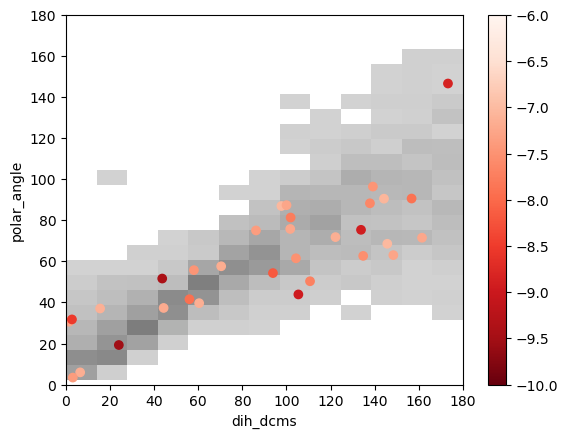

In [98]:
_ = kMDCM_dimer_anio[kMDCM_dimer_anio["min_hbond"] < 2]

sns.histplot(_, x="dih_dcms", y="polar_angle", color="grey", alpha=0.75)


_ = _[_["C_error"] < -7]


sc = plt.scatter(
    _["dih_dcms"], _["polar_angle"], c=_["C_error"], alpha=1, cmap="Reds_r"
)
plt.colorbar(sc)
plt.xlim(0, 180)
plt.ylim(0, 180)
plt.clim(-10, -6)

<Axes: xlabel='dih_bin', ylabel='C_error'>

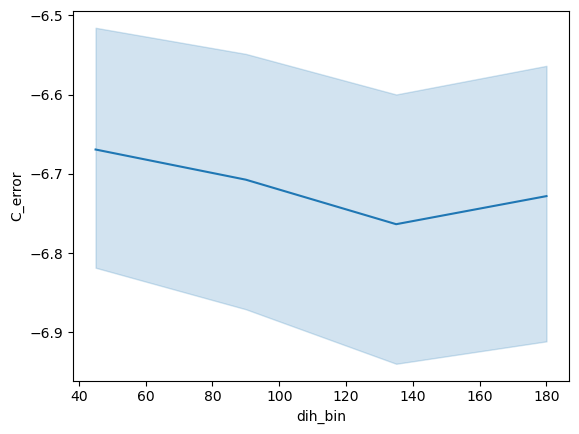

In [119]:
kMDCM_dimer_anio["dih_bin"] = (
    np.digitize(kMDCM_dimer_anio["dih_dcms"], bins=[0, 45, 90, 135, 180]) * 45
)

_ = kMDCM_dimer_anio[kMDCM_dimer_anio["C_error"] < -6]
sns.lineplot(_, x="dih_bin", y="C_error")

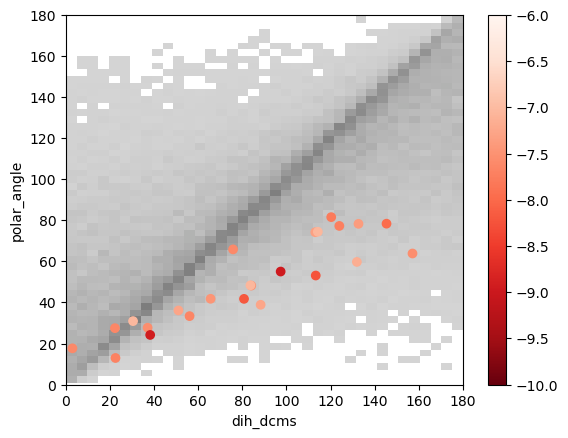

In [99]:
_ = kMDCM_dimer_anio[kMDCM_dimer_anio["min_hbond"] > 2]

sns.histplot(_, x="dih_dcms", y="polar_angle", color="grey", alpha=0.75)


_ = _[_["C_error"] < -7]


sc = plt.scatter(
    _["dih_dcms"], _["polar_angle"], c=_["C_error"], alpha=1, cmap="Reds_r"
)
plt.colorbar(sc)
plt.xlim(0, 180)
plt.ylim(0, 180)
plt.clim(-10, -6)

### Dimers

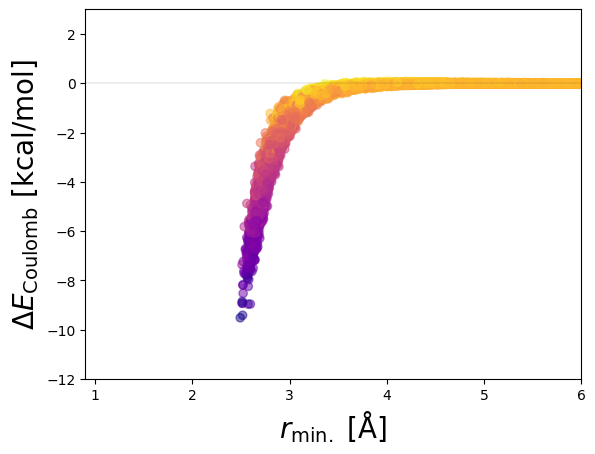

In [80]:
# data_.coloumb.plot.scatter("avg_dist", "SE")
import seaborn as sns

plt.set_cmap("plasma")
# data_.coloumb["C_error"] = data_.coloumb["ECOL"] - data_.coloumb["Ecol_dcm"]
plt.scatter(
    kMDCM_dimer_anio["dist_CM"],
    kMDCM_dimer_anio["C_error"],
    c=kMDCM_dimer_anio["ECOL"],
    alpha=0.5,
)
# sns.lineplot(data_.coloumb, x = "dist_CM", y = "C_error", alpha=0.99, errorbar=("sd",1), c="gray")

plt.ylabel("$\Delta E_{\mathrm{Coulomb}}$ [kcal/mol]", fontsize=20)
plt.xlabel("$r_{\mathrm{min.}}$ [$\mathrm{\AA}$]", fontsize=20)
plt.ylim(-12, 3)
plt.xlim(0.9, 6)
plt.axhline(0, c="k", linewidth=0.1)

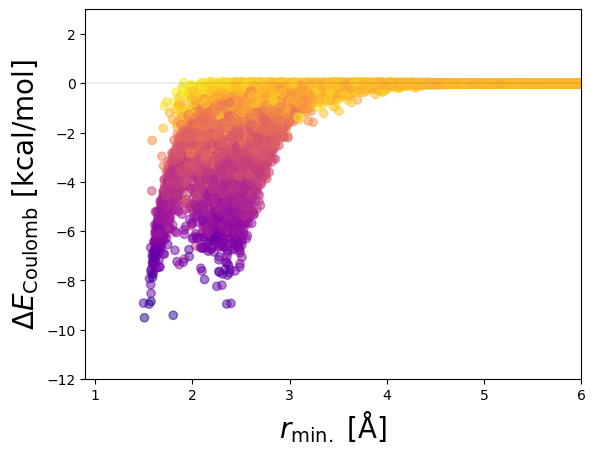

In [81]:
import seaborn as sns

plt.set_cmap("plasma")
# data_.coloumb["C_error"] = data_.coloumb["ECOL"] - data_.coloumb["Ecol_dcm"]
plt.scatter(
    kMDCM_dimer_anio["min_hbond"],
    kMDCM_dimer_anio["C_error"],
    c=kMDCM_dimer_anio["ECOL"],
    alpha=0.5,
)
# sns.lineplot(data_.coloumb, x = "dist_CM", y = "C_error", alpha=0.99, errorbar=("sd",1), c="gray")

plt.ylabel("$\Delta E_{\mathrm{Coulomb}}$ [kcal/mol]", fontsize=20)
plt.xlabel("$r_{\mathrm{min.}}$ [$\mathrm{\AA}$]", fontsize=20)
plt.ylim(-12, 3)
plt.xlim(0.9, 6)
plt.axhline(0, c="k", linewidth=0.1)

###  angle

In [149]:
kMDCM_dimer_anio.sort_values("C_error")

,ECOL,KEY,key,m1,m2,Ecol_dcm,angle_bis,dist_CM,C_error
test378_1_2.py,-20.072318,test378_1_2.py,test378,1,2,-10.554143,74.030980,2.182936,-9.518174
test460_2_6.py,-19.436563,test460_2_6.py,test460,2,6,-10.020233,45.567881,2.650450,-9.416329
test362_1_2.py,-16.869763,test362_1_2.py,test362,1,2,-7.906103,91.795076,2.351458,-8.96366
test195_15_16.py,-17.311182,test195_15_16.py,test195,15,16,-8.349580,121.957116,3.588334,-8.961601
test9_13_19.py,-16.312883,test9_13_19.py,test9,13,19,-7.379421,122.686655,3.306105,-8.933462
...,...,...,...,...,...,...,...,...,...
test279_13_18.py,1.206602,test279_13_18.py,test279,13,18,1.139477,25.532538,4.023209,0.067125
test296_3_17.py,1.460695,test296_3_17.py,test296,3,17,1.390525,105.976011,5.245754,0.070169
test102_4_19.py,1.501404,test102_4_19.py,test102,4,19,1.425586,5.155203,3.901874,0.075818
test163_2_8.py,2.310707,test163_2_8.py,test163,2,8,2.234701,48.787234,3.549664,0.076006


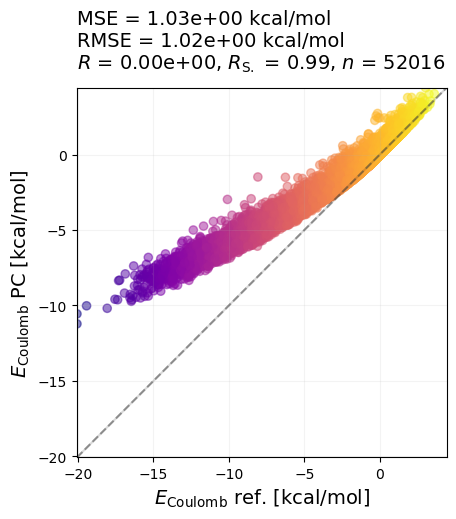

In [86]:
COL = data_.coloumb
COL = COL.dropna()
_ = plot_energy_MSE(
    COL,
    "ECOL",
    "Ecol_dcm",
    elec="ECOL",
    CMAP="plasma",
    xlabel="$E_{\mathrm{Coulomb}}$ ref. [kcal/mol]",
    ylabel="$E_{\mathrm{Coulomb}}$ PC [kcal/mol]",
    bootstrap=False,
)
# COL["Ecol_dcm"]
# COL.plot.scatter("ECOL", "Ecol_dcm")
# COL

##  MDCM

loading pickles from  pickles/water_cluster/pbe0dz/pbe0_dz.mdcm
Strcuture,PDB already already exists, loading structure from pickle
Fitting parameters: kb, ka, r0, a0


/home/boittier/Documents/phd/ff_energy/ff_energy/bonded_terms.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_monomer_df = self.df.groupby(


,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
test467,-113.436686,test467,21.39109,-81.32190,14.82881,test467,-1527.154217,test467,20,-1527.236629,190,-51.714066,-50.297664,-958293.852586,-958295.211607,-958345.566652,-66.49309,-66.49309
test263,-159.213355,test263,19.20382,-122.03878,20.54380,test263,-1527.156016,test263,20,-1527.258259,190,-64.157783,-66.601357,-958294.981314,-958296.144719,-958359.139096,-101.49498,-101.49498
test35,-138.530827,test35,22.25853,-100.65197,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,-958286.913137,-958288.376038,-958359.343368,-89.59976,-89.59976
test223,-85.840765,test223,22.62790,-61.61795,6.72946,test223,-1527.147556,test223,20,-1527.203106,190,-34.857221,-39.243367,-958289.673128,-958290.449874,-958324.530348,-54.88849,-54.88849
test254,-157.431989,test254,22.63732,-124.82730,21.85417,test254,-1527.135568,test254,20,-1527.237145,188,-63.739697,-57.830990,-958282.150371,-958283.041933,-958345.890067,-102.97313,-102.97313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test100,-120.244324,test100,22.94489,-100.52188,19.45476,test100,-1527.141372,test100,20,-1527.210157,190,-43.162995,-42.125801,-958285.792204,-958287.528319,-958328.955198,-81.06712,-81.06712
test304,-123.903711,test304,20.88239,-105.35181,17.28253,test304,-1527.150985,test304,20,-1527.239633,189,-55.626955,-54.710834,-958291.824384,-958293.116885,-958347.451339,-88.06928,-88.06928
test327,-195.846922,test327,19.07727,-157.43693,31.12436,test327,-1527.154084,test327,20,-1527.300559,190,-91.913853,-79.340573,-958293.768884,-958295.335949,-958385.682737,-126.31257,-126.31257
test185,-114.232038,test185,23.27487,-91.75524,11.20177,test185,-1527.144999,test185,20,-1527.232387,190,-54.835874,-54.451833,-958288.068584,-958289.053297,-958342.904458,-80.55347,-80.55347


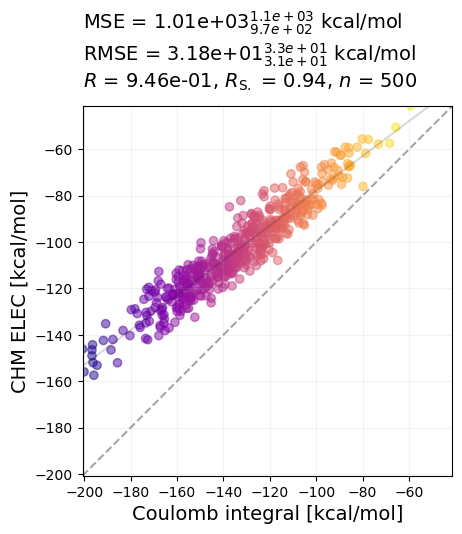

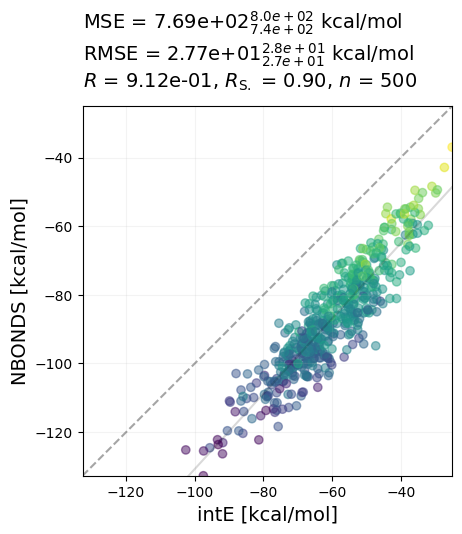

In [10]:
data_ = Data("pickles/water_cluster/pbe0dz/pbe0_dz.mdcm")
data_.plot_ecol()
# data_.data = data_.data[data_.data["ECOL"] < -40]
# data_.data["ECOL"] = Data("pickles/water_cluster/pbe0_dz.pc").data["ECOL"]
data_.plot_intE()
pc_pbedz = data_.data
pc_pbedz

#  add the D4 data


In [11]:
pc_pbedz_d4_copy = pc_pbedz.copy()
pc_pbedz_d4_copy.head()

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
test467,-113.436686,test467,21.39109,-81.32190,14.82881,test467,-1527.154217,test467,20,-1527.236629,190,-51.714066,-50.297664,-958293.852586,-958295.211607,-958345.566652,-66.49309,-66.49309
test263,-159.213355,test263,19.20382,-122.03878,20.54380,test263,-1527.156016,test263,20,-1527.258259,190,-64.157783,-66.601357,-958294.981314,-958296.144719,-958359.139096,-101.49498,-101.49498
test35,-138.530827,test35,22.25853,-100.65197,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,-958286.913137,-958288.376038,-958359.343368,-89.59976,-89.59976
test223,-85.840765,test223,22.62790,-61.61795,6.72946,test223,-1527.147556,test223,20,-1527.203106,190,-34.857221,-39.243367,-958289.673128,-958290.449874,-958324.530348,-54.88849,-54.88849
test254,-157.431989,test254,22.63732,-124.82730,21.85417,test254,-1527.135568,test254,20,-1527.237145,188,-63.739697,-57.830990,-958282.150371,-958283.041933,-958345.890067,-102.97313,-102.97313


In [12]:
pc_pbedz_d4.head()

,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol
test467,None,None,None,test467,-1527.157405,test467,20.0,-1527.260977,190,-64.991515,-63.648003,-958295.853041,-958297.210085,-958360.844556
test263,None,None,None,test263,-1527.159203,test263,20.0,-1527.286187,190,-79.682966,-82.192121,-958296.981291,-958298.142757,-958376.664258
test35,None,None,None,test35,-1527.146351,test35,20.0,-1527.281757,190,-84.967747,-82.379009,-958288.916673,-958290.376761,-958373.884419
test223,None,None,None,test223,-1527.150761,test223,20.0,-1527.225180,190,-46.697637,-51.221802,-958291.684287,-958292.461129,-958338.381925
test254,None,None,None,test254,-1527.138789,test254,20.0,-1527.262467,190,-77.608492,-76.767666,-958284.171602,-958285.064850,-958361.780093


In [13]:
keys = ['M_ENERGY', 'C_ENERGY', 'intE', 'P_intE', 'm_E_tot',
       'p_m_E_tot', 'C_ENERGY_kcalmol']
for k in keys:
    pc_pbedz_d4_copy[k] = pc_pbedz_d4[k]

In [14]:
pc_pbedz_d4_copy.head()

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,NBONDS,nb_intE
test467,-113.436686,test467,21.39109,-81.32190,14.82881,test467,-1527.157405,test467,20,-1527.260977,190,-64.991515,-63.648003,-958295.853041,-958297.210085,-958360.844556,-66.49309,-66.49309
test263,-159.213355,test263,19.20382,-122.03878,20.54380,test263,-1527.159203,test263,20,-1527.286187,190,-79.682966,-82.192121,-958296.981291,-958298.142757,-958376.664258,-101.49498,-101.49498
test35,-138.530827,test35,22.25853,-100.65197,11.05221,test35,-1527.146351,test35,20,-1527.281757,189,-84.967747,-82.379009,-958288.916673,-958290.376761,-958373.884419,-89.59976,-89.59976
test223,-85.840765,test223,22.62790,-61.61795,6.72946,test223,-1527.150761,test223,20,-1527.225180,190,-46.697637,-51.221802,-958291.684287,-958292.461129,-958338.381925,-54.88849,-54.88849
test254,-157.431989,test254,22.63732,-124.82730,21.85417,test254,-1527.138789,test254,20,-1527.262467,188,-77.608492,-76.767666,-958284.171602,-958285.064850,-958361.780093,-102.97313,-102.97313


In [15]:
from ff_energy.utils import pickle_output, read_from_pickle
data_.data = pc_pbedz_d4_copy
pickle_output(data_, "data_mdcm_pbe0_d4.obj")
data_from_pkl = read_from_pickle("pickles/data_mdcm_pbe0_d4.obj.pkl")
data = next(data_from_pkl)
data

In [ ]:
data_.coloumb["key"] = data_.coloumb["KEY"].apply(lambda x: x.split(".")[0])
data_.coloumb["m1"] = data_.coloumb["key"].apply(lambda x: x.split("_")[1])
data_.coloumb["m2"] = data_.coloumb["key"].apply(lambda x: x.split("_")[2])
data_.coloumb["key"] = data_.coloumb["key"].apply(lambda x: x.split("_")[0])
data_.coloumb

from ff_energy.cli import get_structures
from ff_energy.potential import Ecoloumb

structures, pdbs = get_structures("water_cluster")
structure_key_pairs = {p.split(".")[0]: s for p, s in zip(pdbs, structures)}

E_col_dcms = []
dist_dcms = []

for fnkey in data_.coloumb.index:
    k = fnkey.split("_")[0]
    kab = fnkey.split(".")[0]
    s = structure_key_pairs[k]
    dcm_path = (
        "/home/boittier/homeb/water_cluster/pbe0dz_mdcm/{}/charmm/dcm.xyz".format(k)
    )
    s.load_dcm(dcm_path)
    dcms = np.array(s.dcm_charges)
    E = 0
    dists = []

    pairs = [(int(kab.split("_")[1]), int(kab.split("_")[2]))]
    for pair in pairs:
        p1, p2 = pair
        mask1 = s.dcm_charges_mask[p1]
        mask2 = s.dcm_charges_mask[p2]
        dcm1 = dcms[mask1]
        dcm2 = dcms[mask2]
        for a in dcm1:
            for b in dcm2:
                dist = np.linalg.norm(a[:-1] - b[:-1])
                dists.append(dist)
                Ec = Ecoloumb(a[-1], b[-1], dist)
                # print(dist, Ec)
                E += Ec
    # print(E)
    E_col_dcms.append(E)
    dist_dcms.append(np.min(dists) // 1)

# data_.data["Ecol_dcm"] = E_col_dcms
data_.coloumb["Ecol_dcm"] = E_col_dcms
data_.coloumb["avg_dist"] = dist_dcms

Strcuture,PDB already already exists, loading structure from pickle


In [259]:
data_.coloumb["polar_angle"] = PC_dimer_anio["polar_angle"]
data_.coloumb["dist_CM"] = PC_dimer_anio["dist_CM"]
data_.coloumb["dih_dcms"] = PC_dimer_anio["dih_dcms"]
data_.coloumb["min_hbond"] = PC_dimer_anio["min_hbond"]
mdcm_dimer_anio = data_.coloumb
mdcm_dimer_anio["C_error"] = mdcm_dimer_anio["ECOL"] - mdcm_dimer_anio["Ecol_dcm"]

In [92]:
# mdcm_dimer_anio["min_hbond"] = PC_dimer_anio["min_hbond"]

### 2 angles


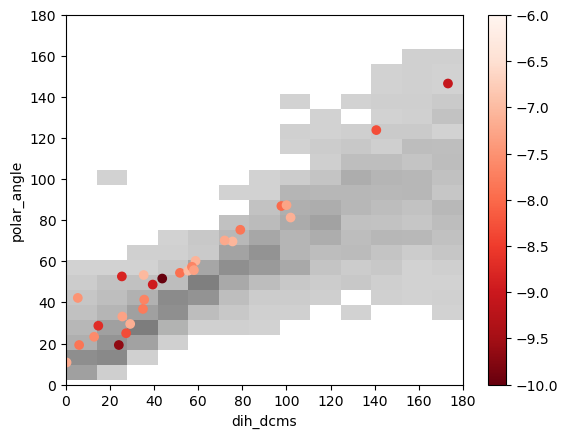

In [103]:
_ = mdcm_dimer_anio[mdcm_dimer_anio["min_hbond"] < 2]

sns.histplot(_, x="dih_dcms", y="polar_angle", color="grey", alpha=0.75)


_ = _[_["C_error"] < -7]


sc = plt.scatter(
    _["dih_dcms"], _["polar_angle"], c=_["C_error"], alpha=1, cmap="Reds_r"
)
plt.colorbar(sc)
plt.xlim(0, 180)
plt.ylim(0, 180)
plt.clim(-10, -6)

<Axes: xlabel='dih_bin', ylabel='C_error'>

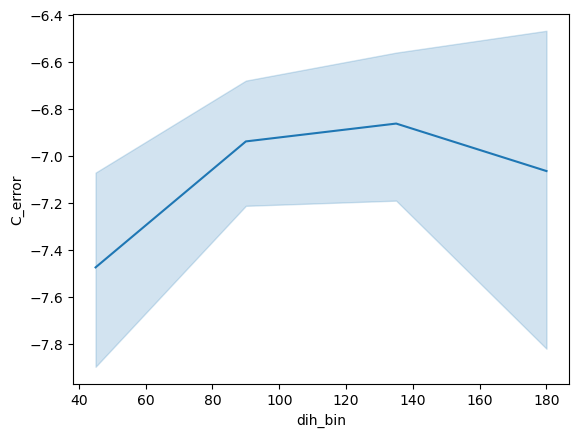

In [120]:
mdcm_dimer_anio["dih_bin"] = (
    np.digitize(mdcm_dimer_anio["dih_dcms"], bins=[0, 45, 90, 135, 180]) * 45
)

_ = mdcm_dimer_anio[mdcm_dimer_anio["C_error"] < -6]
sns.lineplot(_, x="dih_bin", y="C_error")

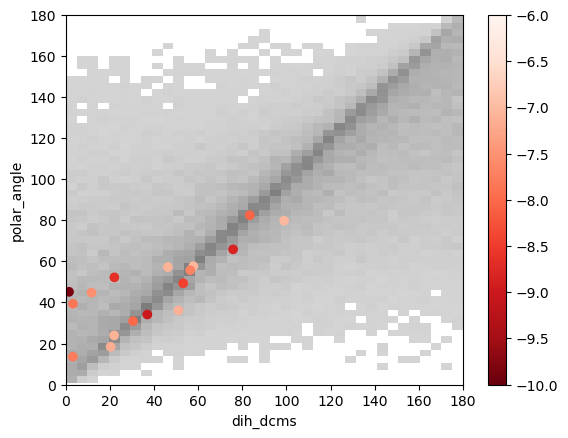

In [102]:
_ = mdcm_dimer_anio[mdcm_dimer_anio["min_hbond"] > 2]

sns.histplot(_, x="dih_dcms", y="polar_angle", color="grey", alpha=0.75)


_ = _[_["C_error"] < -7]


sc = plt.scatter(
    _["dih_dcms"], _["polar_angle"], c=_["C_error"], alpha=1, cmap="Reds_r"
)
plt.colorbar(sc)
plt.xlim(0, 180)
plt.ylim(0, 180)
plt.clim(-10, -6)

### Dimers

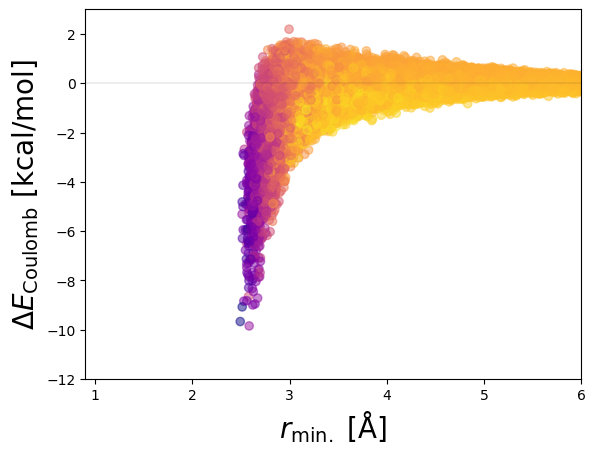

In [96]:
# data_.coloumb.plot.scatter("avg_dist", "SE")
import seaborn as sns

plt.set_cmap("plasma")
mdcm_dimer_anio["C_error"] = mdcm_dimer_anio["ECOL"] - mdcm_dimer_anio["Ecol_dcm"]
plt.scatter(
    mdcm_dimer_anio["dist_CM"],
    mdcm_dimer_anio["C_error"],
    c=mdcm_dimer_anio["ECOL"],
    alpha=0.5,
)
plt.ylabel("$\Delta E_{\mathrm{Coulomb}}$ [kcal/mol]", fontsize=20)
plt.xlabel("$r_{\mathrm{min.}}$ [$\mathrm{\AA}$]", fontsize=20)
# sns.lineplot(data_.coloumb,
#              x = "avg_dist", y = "C_error",
#              alpha=0.99, errorbar=("sd",1), c="gray")
plt.ylim(-12, 3)
plt.xlim(0.9, 6)
plt.axhline(0, c="k", linewidth=0.1)

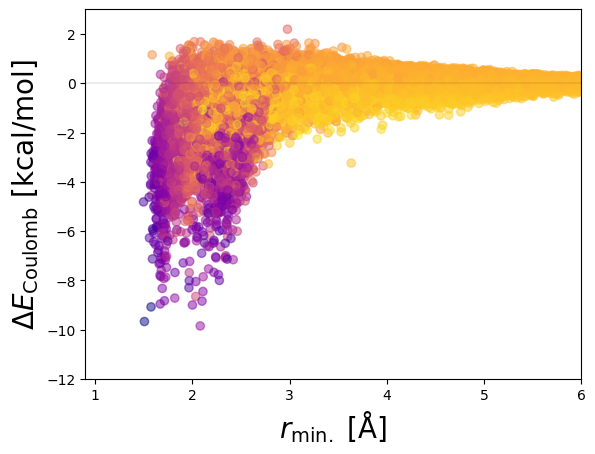

In [97]:
# data_.coloumb.plot.scatter("avg_dist", "SE")
import seaborn as sns

plt.set_cmap("plasma")
mdcm_dimer_anio["C_error"] = mdcm_dimer_anio["ECOL"] - mdcm_dimer_anio["Ecol_dcm"]
plt.scatter(
    mdcm_dimer_anio["min_hbond"],
    mdcm_dimer_anio["C_error"],
    c=mdcm_dimer_anio["ECOL"],
    alpha=0.5,
)
plt.ylabel("$\Delta E_{\mathrm{Coulomb}}$ [kcal/mol]", fontsize=20)
plt.xlabel("$r_{\mathrm{min.}}$ [$\mathrm{\AA}$]", fontsize=20)
# sns.lineplot(data_.coloumb,
#              x = "avg_dist", y = "C_error",
#              alpha=0.99, errorbar=("sd",1), c="gray")
plt.ylim(-12, 3)
plt.xlim(0.9, 6)
plt.axhline(0, c="k", linewidth=0.1)

###  angle

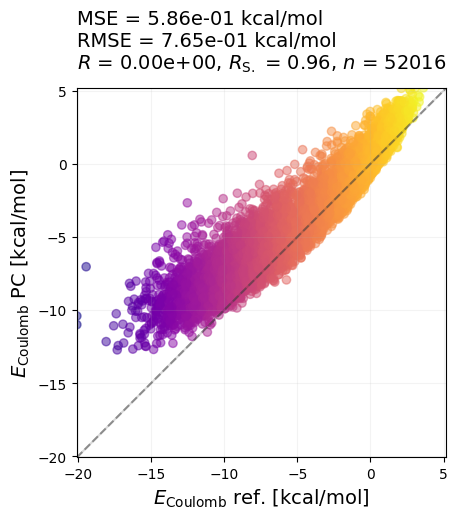

In [18]:
COL = data_.coloumb
COL = COL.dropna()
_ = plot_energy_MSE(
    COL,
    "ECOL",
    "Ecol_dcm",
    elec="ECOL",
    CMAP="plasma",
    xlabel="$E_{\mathrm{Coulomb}}$ ref. [kcal/mol]",
    ylabel="$E_{\mathrm{Coulomb}}$ PC [kcal/mol]",
    bootstrap=False,
)

loading pickles from  pickles/water_dimer/pbe0dz/pbe0_dz.pc


,ECOL,KEY,TOTAL,ELEC,VDW,M_ENERGY,C_ENERGY,n_pairs,intE,NBONDS,nb_intE
8-5,-2.711303,8-5,16.31643,-2.35895,-0.16610,-152.714146,-152.718715,0,-2.867130,-2.52505,-2.52505
11-1,-1.454652,11-1,15.98387,-1.66546,-0.09868,-152.714178,-152.716845,0,-1.673438,-1.76414,-1.76414
20-2,-0.230566,20-2,15.65111,-0.27016,-0.00946,-152.714157,-152.714546,0,-0.244218,-0.27962,-0.27962
10-1,-1.849817,10-1,16.10469,-2.06090,-0.13178,-152.714178,-152.717566,0,-2.125892,-2.19268,-2.19268
1-3,-79.263613,1-3,56164.73741,-50.36029,11468.04558,-152.714157,-152.361083,1,221.554925,11417.68529,11417.68529
...,...,...,...,...,...,...,...,...,...,...,...
9-5,-1.929427,9-5,16.04242,-1.76150,-0.18014,-152.714175,-152.717712,0,-2.219390,-1.94164,-1.94164
13-4,-0.443768,13-4,15.63047,-0.44724,-0.03611,-152.714172,-152.714968,0,-0.499618,-0.48335,-0.48335
8-1,-3.276764,8-1,16.48543,-3.32071,-0.19534,-152.714178,-152.719742,1,-3.491734,-3.51605,-3.51605
22-1,-0.240576,22-1,15.59788,-0.30815,-0.00556,-152.714178,-152.714576,0,-0.249539,-0.31371,-0.31371


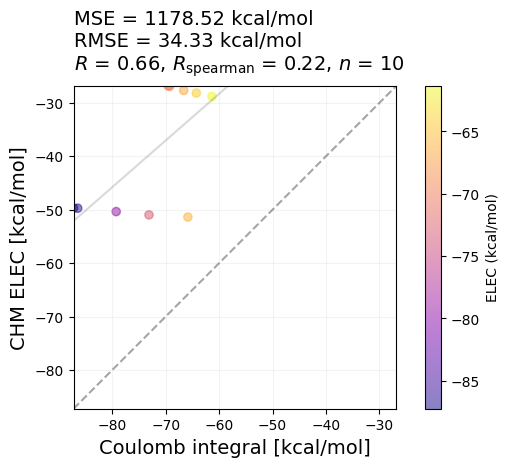

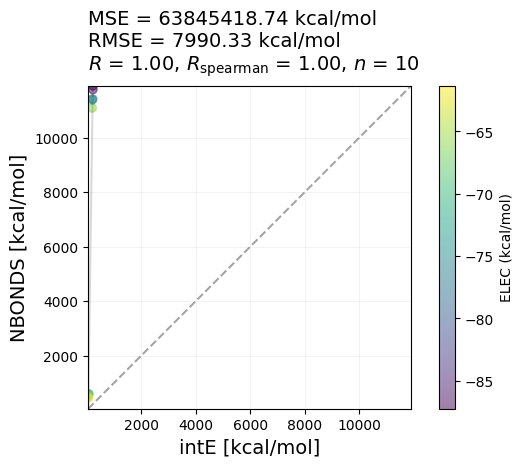

In [93]:
data_ = Data("pickles/water_dimer/pbe0dz/pbe0_dz.pc")
data_.plot_ecol()
data_.plot_intE()
data_.data

Strcuture,PDB already already exists, loading structure from pickle


In [110]:
from ff_energy.cli import get_structures
from ff_energy.potential import Ecoloumb

structures, pdbs = get_structures("water_dimer")
structure_key_pairs = {p.split(".")[i]: s for p, s in zip(pdbs, structures)}

E_col_dcms = []
for k in data_.data.index:
    s = structure_key_pairs[k]
    dcm_path = "/home/boittier/homeb/water_dimer/pbe0dz_pc/{}/charmm/dcm.xyz".format(k)
    s.load_dcm(dcm_path)
    dcms = np.array(s.dcm_charges)
    E = 0
    for pair in s.pairs:
        p1, p2 = pair

        mask1 = s.res_mask[p1]
        mask2 = s.res_mask[p2]
        dcm1 = dcms[mask1]
        dcm2 = dcms[mask2]
        for a in dcm1:
            for b in dcm2:
                dist = np.linalg.norm(a[:-1] - b[:-1])
                Ec = Ecoloumb(a[-1], b[-1], dist)
                # print(dist, Ec)
                E += Ec
    # print(E)
    E_col_dcms.append(E)

data_.data["Ecol_dcm"] = E_col_dcms

Strcuture,PDB already already exists, loading structure from pickle


In [111]:
data_.data

,ECOL,KEY,TOTAL,ELEC,VDW,M_ENERGY,C_ENERGY,n_pairs,intE,NBONDS,nb_intE,Ecol_dcm
8-5,-2.711303,8-5,16.16705,-2.02771,-0.16610,-152.714146,-152.718715,0,-2.867130,-2.19381,-2.19381,-2.358177
11-1,-1.454652,11-1,15.86650,-1.21448,-0.09868,-152.714178,-152.716845,0,-1.673438,-1.31316,-1.31316,-1.665286
20-2,-0.230566,20-2,15.63755,-0.19660,-0.00946,-152.714157,-152.714546,0,-0.244218,-0.20606,-0.20606,-0.270032
10-1,-1.849817,10-1,15.95085,-1.51603,-0.13178,-152.714178,-152.717566,0,-2.125892,-1.64781,-1.64781,-2.060696
1-3,-79.263613,1-3,56182.45552,-37.51652,11468.04558,-152.714157,-152.361083,1,221.554925,11430.52906,11430.52906,-50.356685
...,...,...,...,...,...,...,...,...,...,...,...,...
9-5,-1.929427,9-5,15.94938,-1.51058,-0.18014,-152.714175,-152.717712,0,-2.219390,-1.69072,-1.69072,-1.760847
13-4,-0.443768,13-4,15.61830,-0.37022,-0.03611,-152.714172,-152.714968,0,-0.499618,-0.40633,-0.40633,-0.446963
8-1,-3.276764,8-1,16.19139,-2.48833,-0.19534,-152.714178,-152.719742,1,-3.491734,-2.68367,-2.68367,-3.320421
22-1,-0.240576,22-1,15.57916,-0.20981,-0.00556,-152.714178,-152.714576,0,-0.249539,-0.21537,-0.21537,-0.308089


In [105]:
from ff_energy.plot import plot_energy_MSE

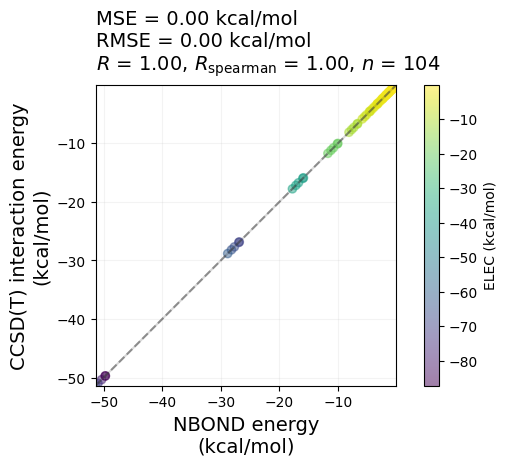

In [108]:
_ = plot_energy_MSE(data_.data, "ELEC", "Ecol_dcm", elec="ECOL")

loading pickles from  pickles/water_dimer/pbe0dz/pbe0_dz.mdcm


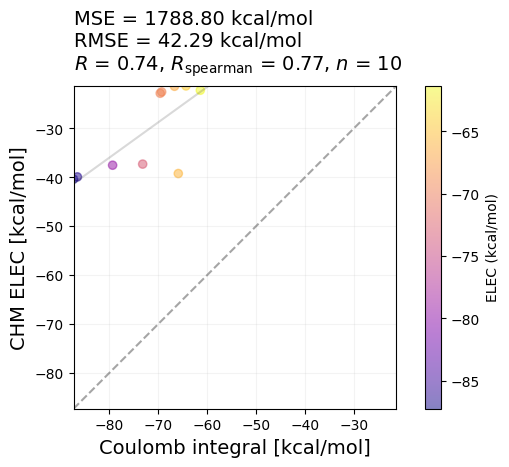

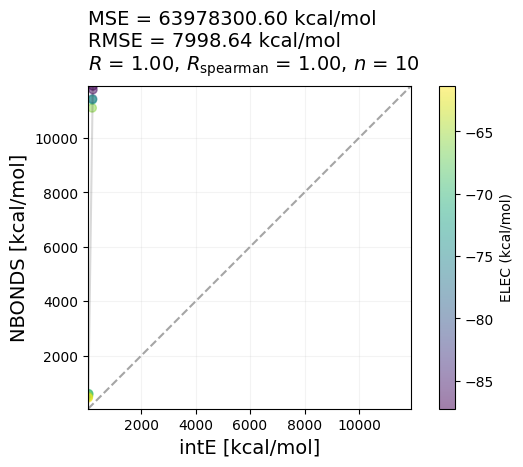

In [112]:
data_ = Data("pickles/water_dimer/pbe0dz/pbe0_dz.mdcm")
data_.data = data_.data.dropna()
data_.plot_ecol()
data_.plot_intE()
# data_.data

Strcuture,PDB already already exists, loading structure from pickle


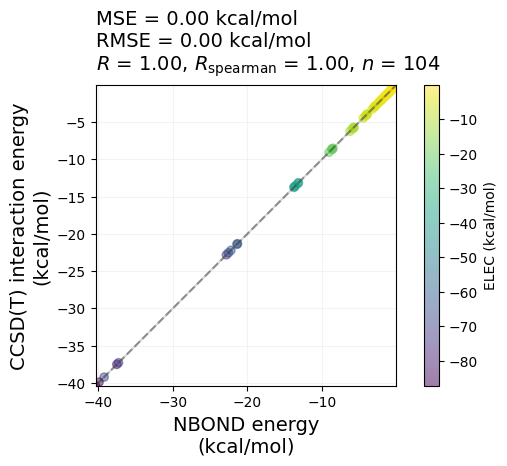

In [130]:
from ff_energy.cli import get_structures
from ff_energy.potential import Ecoloumb

structures, pdbs = get_structures("water_dimer")
structure_key_pairs = {p.split(".")[i]: s for p, s in zip(pdbs, structures)}

E_col_dcms = []
for k in data_.data.index:
    s = structure_key_pairs[k]
    dcm_path = "/home/boittier/homeb/water_dimer/pbe0dz_mdcm/{}/charmm/dcm.xyz".format(
        k
    )
    s.load_dcm(dcm_path)
    dcms = np.array(s.dcm_charges)
    # print(len(dcms))
    E = 0
    for pair in s.pairs:
        p1, p2 = pair
        mask1 = s.dcm_charges_mask[p1]
        mask2 = s.dcm_charges_mask[p2]
        # print(mask1)#mask2)
        dcm1 = dcms[mask1]
        dcm2 = dcms[mask2]
        for a in dcm1:
            for b in dcm2:
                dist = np.linalg.norm(a[:-1] - b[:-1])
                Ec = Ecoloumb(a[-1], b[-1], dist)
                # print(dist, Ec)
                E += Ec
    # print(E)
    E_col_dcms.append(E)

data_.data["Ecol_dcm"] = E_col_dcms
_ = plot_energy_MSE(data_.data, "ELEC", "Ecol_dcm", elec="ECOL")

/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/scipy/stats/_resampling.py:97: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  warnings.warn(DegenerateDataWarning(msg))


<Axes: xlabel='NBOND energy\n(kcal/mol)', ylabel='CCSD(T) interaction energy\n(kcal/mol)'>

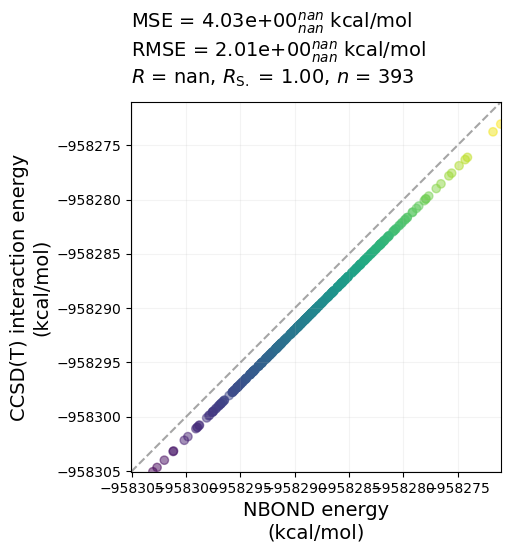

In [36]:
plot_energy_MSE(dispersion_comp, "m_E_tot", "m_E_tot-D4", elec="m_E_tot")

In [38]:
dispersion_comp

Index(['ECOL', 'KEY', 'TOTAL', 'ELEC', 'VDW', 'KEY', 'M_ENERGY', 'KEY',
       'n_monomers', 'C_ENERGY', 'n_pairs', 'intE', 'P_intE', 'm_E_tot',
       'p_m_E_tot', 'C_ENERGY_kcalmol', 'NBONDS', 'nb_intE', 'TOTAL-D4',
       'ELEC-D4', 'VDW-D4', 'KEY-D4', 'M_ENERGY-D4', 'KEY-D4', 'n_monomers-D4',
       'C_ENERGY-D4', 'n_pairs-D4', 'intE-D4', 'P_intE-D4', 'm_E_tot-D4',
       'p_m_E_tot-D4', 'C_ENERGY_kcalmol-D4'],
      dtype='object')